# Statistical Analysis of data

In [887]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t, kurtosis, shapiro


In [888]:
data = pd.read_excel('C:/Users/z_ref_analyst1/Desktop/CCR_Img_regression/sample1/data.xlsx')

In [889]:
data.drop(columns=['Unnamed: 0', 'files'], inplace=True)

In [890]:
data.head()

,R,G,B
0,59.119395,84.503253,122.595899
1,58.265692,81.351316,118.398007
2,58.274190,83.678625,122.045920
3,41.212943,63.754809,94.061205
4,61.465388,86.748452,120.482635


In [891]:
features = [feature for feature in data.columns]

In [892]:
features

['R', 'G', 'B']

### distribution plots of features R, G, B

subsample_1 distribution plot


C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\3817735587.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], ax = ax, kde = True)
C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\3817735587.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], a

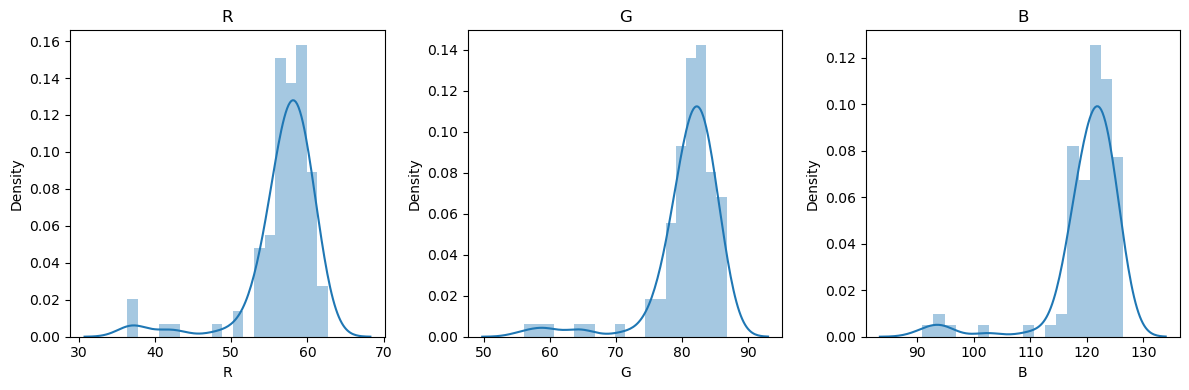

In [893]:
print('subsample_1 distribution plot')
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    sns.distplot(data[feature], ax = ax, kde = True)
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

In [996]:
# Observation :  Features are left skewded with heavy tail

### QQ-plot 

subsample_1 distribution plot


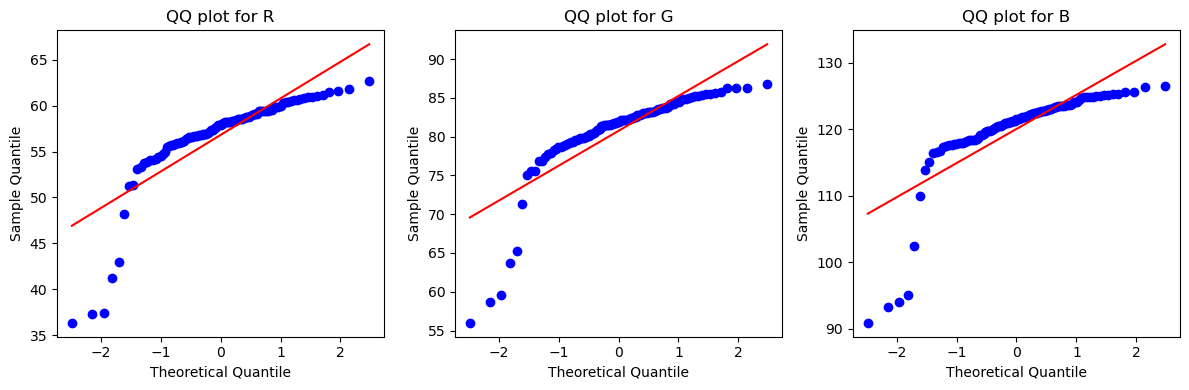

In [894]:
print('subsample_1 distribution plot')
features = ["R", "G", "B"]
fig, axes = plt.subplots(1, len(features), figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    stats.probplot(data[feature], plot= ax)
    #plt.xlabel(feature)
    #plt.ylabel('Count')

    ax.set_title(f'QQ plot for {feature}')
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Sample Quantile')

plt.tight_layout()
plt.show()

### Kurtosis plot

R     8.772946
G     9.280480
B    10.768677
dtype: float64


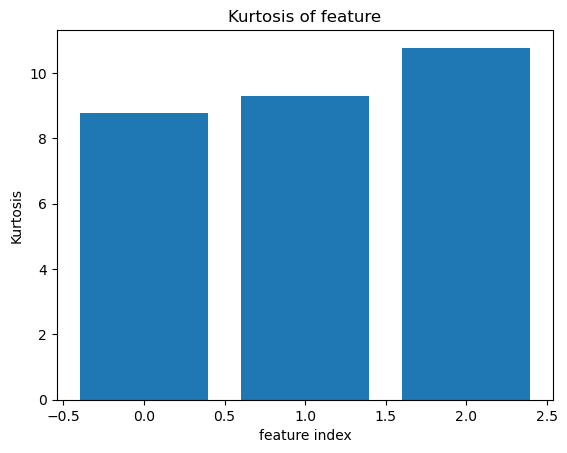

In [895]:
kurtosis_values = data.kurtosis()
print(kurtosis_values)
plt.bar(range(len(kurtosis_values)), kurtosis_values)
plt.xlabel('feature index')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of feature')
plt.show()
# Kurtosis : it is statistical measure that describe the shape of a distribution. It quantifies the extent to which a distribution devitaes from the shape of a normal distribution.
# A positive values indicates a distribution with heavier tails and a sharper peak compared to a normal distribution, while a negative kurtosis value indicates a distribution with lighter tails and a flatter peak compared to a normal distribution

### Boxplot

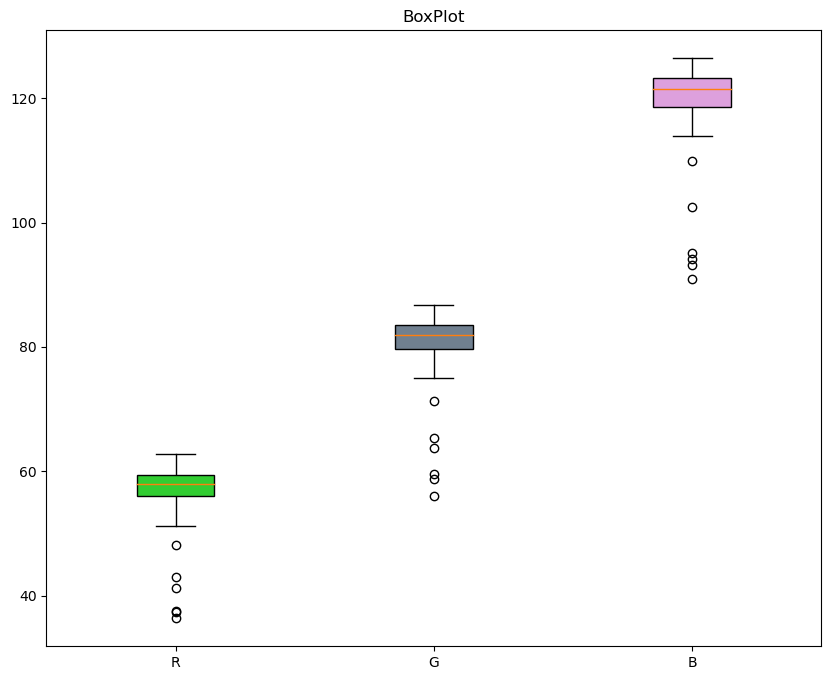

In [896]:
data_values = [data['R'], data['G'], data['B']]
labels = ['R', 'G', 'B']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(data_values, patch_artist=True)
colors = ['limegreen','slategray', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels)
ax.set_title('BoxPlot')
plt.show()

### shapiro Wilk test for normality

In [897]:
# shappiiro wilk test assumption
# Data should be iid
# Shapiro wilk test is sensitive to departures from normality in the tails of the distribution

In [898]:
r_values = data['R']
g_values = data['G']
b_values = data['B']

r_stat, r_pvalue = shapiro(r_values)
g_stat, g_pvalue = shapiro(g_values)
b_stat, b_pvalue = shapiro(b_values)

alpha = 0.05

print('Shapiro-Wilk Test Results')
print("Feature 'R':")
if r_pvalue > alpha:
    print('\tp-value = ', r_pvalue)
    print('\tCannot reject null hypothesis. The feature "R" follows a normal distribution.')
else:
    print('\tp-value =', r_pvalue)
    print('\t Reject null hypothesis. The feature "R" does not follow a normal distribution')


print("Feature 'G':")
if r_pvalue > alpha:
    print('\tp-value = ', g_pvalue)
    print('\tCannot reject null hypothesis. The feature "G" follows a normal distribution.')
else:
    print('\tp-value =', g_pvalue)
    print('\t Reject null hypothesis. The feature "G" does not follow a normal distribution')

print("Feature 'B':")
if r_pvalue > alpha:
    print('\tp-value = ', b_pvalue)
    print('\tCannot reject null hypothesis. The feature "B" follows a normal distribution.')
else:
    print('\tp-value =', b_pvalue)
    print('\t Reject null hypothesis. The feature "B" does not follow a normal distribution')

Shapiro-Wilk Test Results
Feature 'R':
	p-value = 3.069335963775538e-13
	 Reject null hypothesis. The feature "R" does not follow a normal distribution
Feature 'G':
	p-value = 2.940104214775585e-13
	 Reject null hypothesis. The feature "G" does not follow a normal distribution
Feature 'B':
	p-value = 1.3010414211364792e-14
	 Reject null hypothesis. The feature "B" does not follow a normal distribution


In [997]:
# observation : if data is not normal then accuracy of parametric models can be affected as this models assumes data follows normal distribution 
# parametric models : Linear regression, Logistic regression, Gaussian Naive Bays, Generalised Linear model, Poisson regression.
# Non Parametric models such as decision tree, random forest, support vector are robust to wide range of distribution including non normal distribution.


### Skewness plot of sample 1

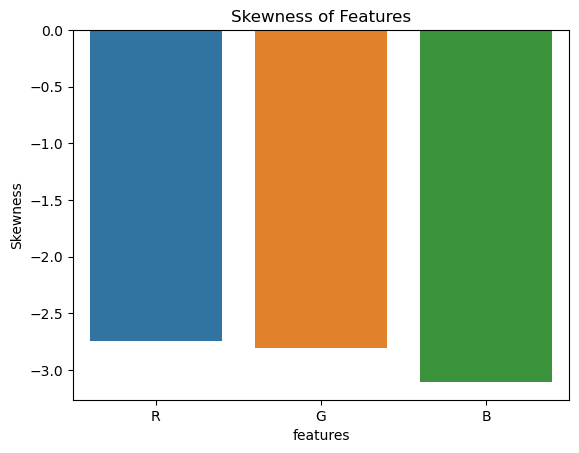

In [988]:
skewness = data.skew()
sns.barplot(x = skewness.index, y = skewness)
plt.title('Skewness of Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

# negative skewness means data skewded to the left and positive skewness means data skewed to the right.

### mean and variance of sample 1

In [899]:
mean_values = {}
variance_values = {}
for i, j in enumerate(data.columns):
   mean_values[i] = np.mean(data[j])
   variance_values[i] = np.var(data[j])
print('subsample_1 mean and variance')
print(f'mean_R : {mean_values[0]}, var_R : {variance_values[0]}\nmean_G : {mean_values[1]}, var_G : {variance_values[1]}\nmean_B : {mean_values[2]}, var_B : {variance_values[2]}')

   

subsample_1 mean and variance
mean_R : 56.80925204761905, var_R : 21.912016093930923
mean_G : 80.74360664761905, var_G : 28.000822728890952
mean_B : 120.04531444761905, var_B : 39.896131179129085


### Five Number Summary of sample 1

In [900]:
# Five number summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R,105.0,56.809252,4.703478,36.342499,56.008400,57.902399,59.418821,62.700007
G,105.0,80.743607,5.316960,56.000277,79.713234,81.931935,83.523386,86.748452
B,105.0,120.045314,6.346633,90.897903,118.538908,121.489836,123.317218,126.430674


In [901]:
data_2 = pd.read_excel('C:/Users/z_ref_analyst1/Desktop/CCR_Img_regression/sample2/data.xlsx')

In [902]:
data_2.drop(columns=['Unnamed: 0', 'files'], inplace=True)

In [903]:
data_2.head()

,R,G,B
0,59.119395,84.503253,122.595899
1,58.265692,81.351316,118.398007
2,58.274190,83.678625,122.045920
3,41.212943,63.754809,94.061205
4,61.465388,86.748452,120.482635


### Distribution plot of sample 2

subsample_2 distribution plot


C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\1706101814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[feature], ax = ax, kde = True)
C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\1706101814.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2[feature

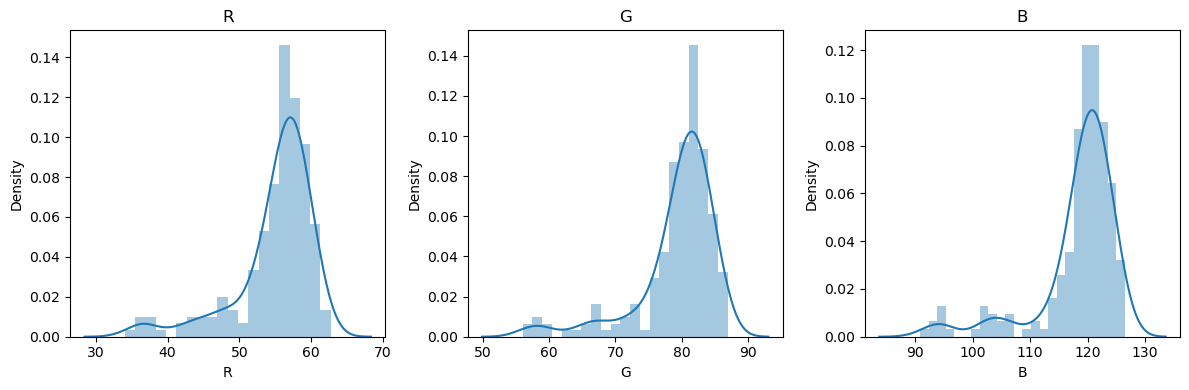

In [904]:
print('subsample_2 distribution plot')
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    sns.distplot(data_2[feature], ax = ax, kde = True)
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

### QQ-plot of sample 2

subsample_2 distribution plot


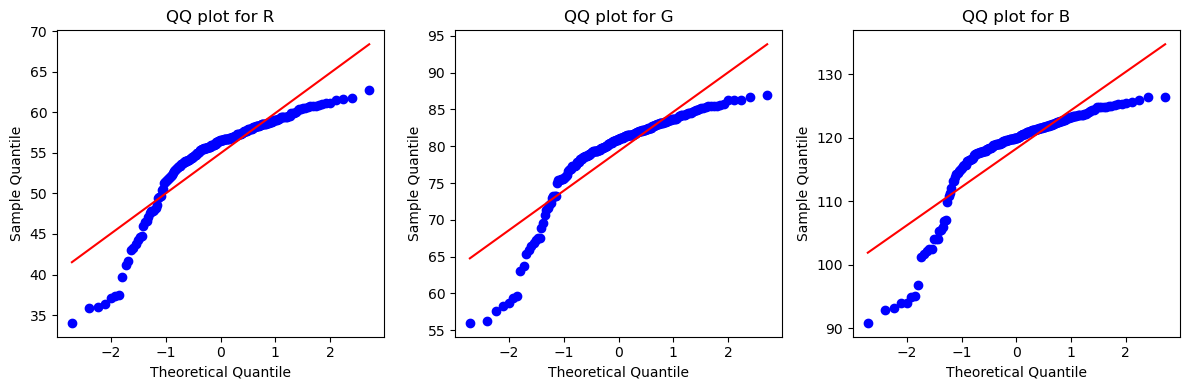

In [905]:
print('subsample_2 distribution plot')
features = ["R", "G", "B"]
fig, axes = plt.subplots(1, len(features), figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    stats.probplot(data_2[feature], plot= ax)
    #plt.xlabel(feature)
    #plt.ylabel('Count')

    ax.set_title(f'QQ plot for {feature}')
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Sample Quantile')

plt.tight_layout()
plt.show()

### Kurtosis of sample 2

R    3.465765
G    4.251071
B    4.568691
dtype: float64


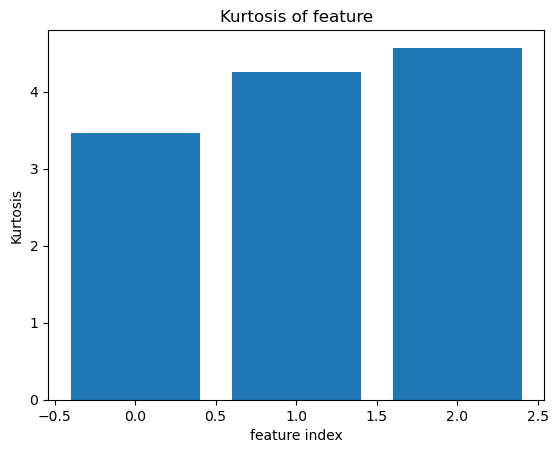

In [906]:
kurtosis_values = data_2.kurtosis()
print(kurtosis_values)
plt.bar(range(len(kurtosis_values)), kurtosis_values)
plt.xlabel('feature index')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of feature')
plt.show()
# Kurtosis : it is statistical measure that describe the shape of a distribution. It quantifies the extent to which a distribution devitaes from the shape of a normal distribution.
# A positive values indicates a distribution with heavier tails and a sharper peak compared to a normal distribution, while a negative kurtosis value indicates a distribution with lighter tails and a flatter peak compared to a normal distribution

### Boxplot of sample 2

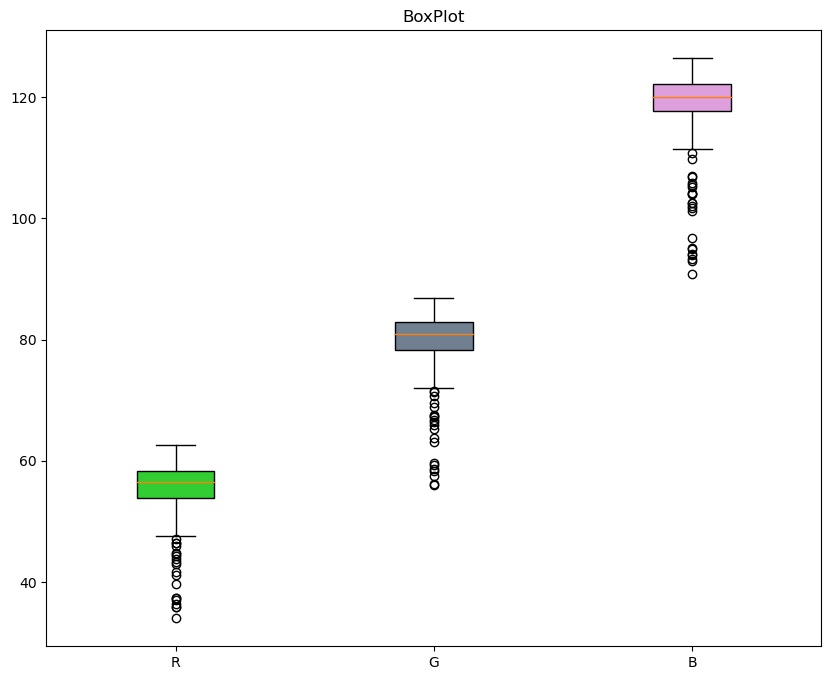

In [907]:
data_values = [data_2['R'], data_2['G'], data_2['B']]
labels = ['R', 'G', 'B']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(data_values, patch_artist=True)
colors = ['limegreen','slategray', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels)
ax.set_title('BoxPlot')
plt.show()

### Shapiro test for sample 2 

In [908]:
# Shapiro test to check normality of distribution of features
r_values = data_2['R']
g_values = data_2['G']
b_values = data_2['B']

r_stat, r_pvalue = shapiro(r_values)
g_stat, g_pvalue = shapiro(g_values)
b_stat, b_pvalue = shapiro(b_values)

alpha = 0.05

print('Shapiro-Wilk Test Results')
print("Feature 'R':")
if r_pvalue > alpha:
    print('\tp-value = ', r_pvalue)
    print('\tCannot reject null hypothesis. The feature "R" follows a normal distribution.')
else:
    print('\tp-value =', r_pvalue)
    print('\t Reject null hypothesis. The feature "R" does not follow a normal distribution')


print("Feature 'G':")
if r_pvalue > alpha:
    print('\tp-value = ', g_pvalue)
    print('\tCannot reject null hypothesis. The feature "G" follows a normal distribution.')
else:
    print('\tp-value =', g_pvalue)
    print('\t Reject null hypothesis. The feature "G" does not follow a normal distribution')

print("Feature 'B':")
if r_pvalue > alpha:
    print('\tp-value = ', b_pvalue)
    print('\tCannot reject null hypothesis. The feature "B" follows a normal distribution.')
else:
    print('\tp-value =', b_pvalue)
    print('\t Reject null hypothesis. The feature "B" does not follow a normal distribution')

Shapiro-Wilk Test Results
Feature 'R':
	p-value = 4.583977139115559e-15
	 Reject null hypothesis. The feature "R" does not follow a normal distribution
Feature 'G':
	p-value = 4.586014782749297e-16
	 Reject null hypothesis. The feature "G" does not follow a normal distribution
Feature 'B':
	p-value = 1.3164238650369064e-17
	 Reject null hypothesis. The feature "B" does not follow a normal distribution


### Skewness of sample 2

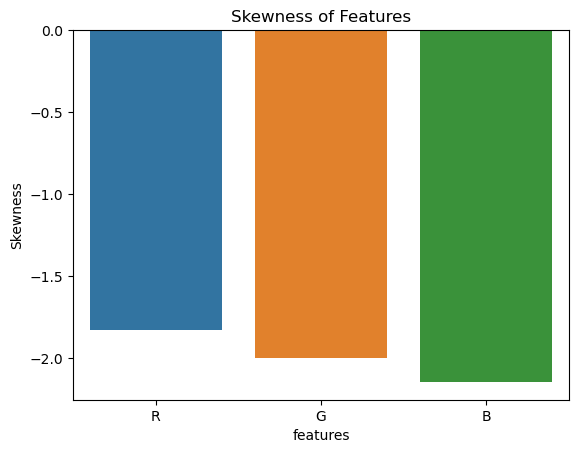

In [989]:
skewness = data_2.skew()
sns.barplot(x = skewness.index, y = skewness)
plt.title('Skewness of Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

# negative skewness means data skewded to the left and positive skewness means data skewed to the right.

### Mean and Variance of sample 2

In [909]:
mean_values = {}
variance_values = {}
for i, j in enumerate(data_2.columns):
   mean_values[i] = np.mean(data_2[j])
   variance_values[i] = np.var(data[j])
print('subsample_2 mean and variance')
print(f'mean_R : {mean_values[0]}, var_R : {variance_values[0]}\nmean_G : {mean_values[1]}, var_G : {variance_values[1]}\nmean_B : {mean_values[2]}, var_B : {variance_values[2]}')


subsample_2 mean and variance
mean_R : 54.959991699999996, var_R : 21.912016093930923
mean_G : 79.3096316095238, var_G : 28.000822728890952
mean_B : 118.34979204761905, var_B : 39.896131179129085


### Five number summary of number of 2

In [910]:
# Five number summary
data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
R,210.0,54.959992,5.436711,34.043104,53.861083,56.589914,58.311518,62.700007
G,210.0,79.309632,5.975861,56.000277,78.341403,80.944531,82.852299,86.951955
B,210.0,118.349792,6.929216,90.897903,117.723112,119.975658,122.170221,126.430674


In [911]:
data_3 = pd.read_excel('C:/Users/z_ref_analyst1/Desktop/CCR_Img_regression/sample3/data.xlsx')

In [912]:
data_3.drop(columns=['Unnamed: 0', 'files'], inplace=True)

In [913]:
data_3.head()

,R,G,B
0,59.119395,84.503253,122.595899
1,58.265692,81.351316,118.398007
2,58.274190,83.678625,122.045920
3,41.212943,63.754809,94.061205
4,61.465388,86.748452,120.482635


### Distribution plot of sample 3

subsample_3 distribution plot


C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\598492084.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[feature], ax = ax, kde = True)
C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\598492084.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3[feature],

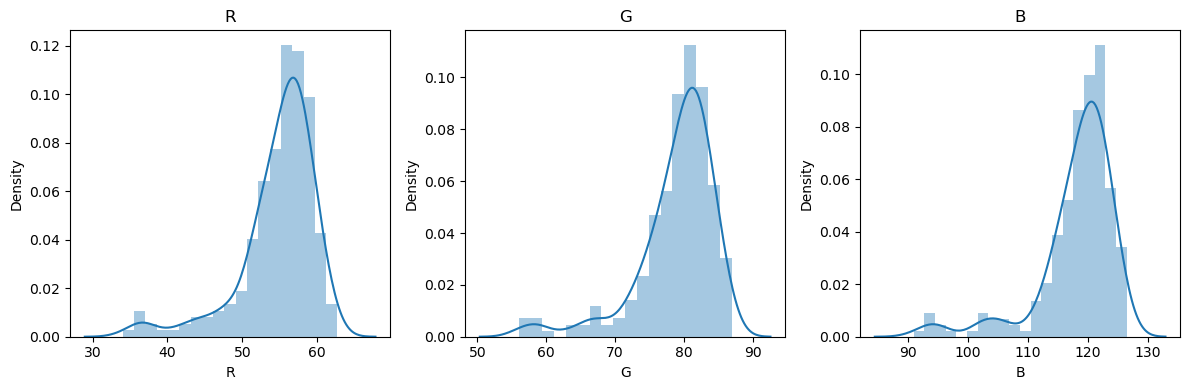

In [914]:
print('subsample_3 distribution plot')
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    sns.distplot(data_3[feature], ax = ax, kde = True)
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

### QQ plot of sample 3

subsample_3 distribution plot


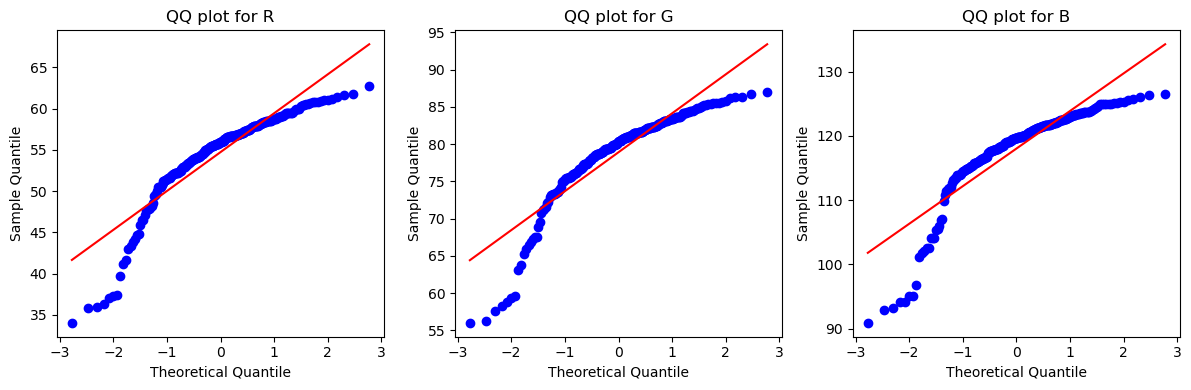

In [915]:
print('subsample_3 distribution plot')
features = ["R", "G", "B"]
fig, axes = plt.subplots(1, len(features), figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    stats.probplot(data_3[feature], plot= ax)
    #plt.xlabel(feature)
    #plt.ylabel('Count')

    ax.set_title(f'QQ plot for {feature}')
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Sample Quantile')

plt.tight_layout()
plt.show()

### Kurtosis of sample 3

R    3.772628
G    4.052039
B    4.725981
dtype: float64


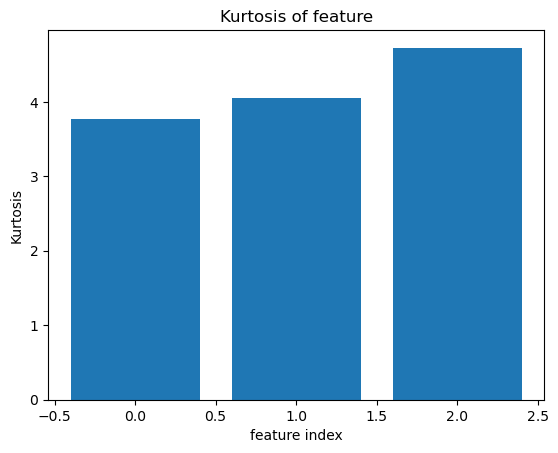

In [916]:
kurtosis_values = data_3.kurtosis()
print(kurtosis_values)
plt.bar(range(len(kurtosis_values)), kurtosis_values)
plt.xlabel('feature index')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of feature')
plt.show()
# Kurtosis : it is statistical measure that describe the shape of a distribution. It quantifies the extent to which a distribution devitaes from the shape of a normal distribution.
# A positive values indicates a distribution with heavier tails and a sharper peak compared to a normal distribution, while a negative kurtosis value indicates a distribution with lighter tails and a flatter peak compared to a normal distribution

### Boxplot of sample 3

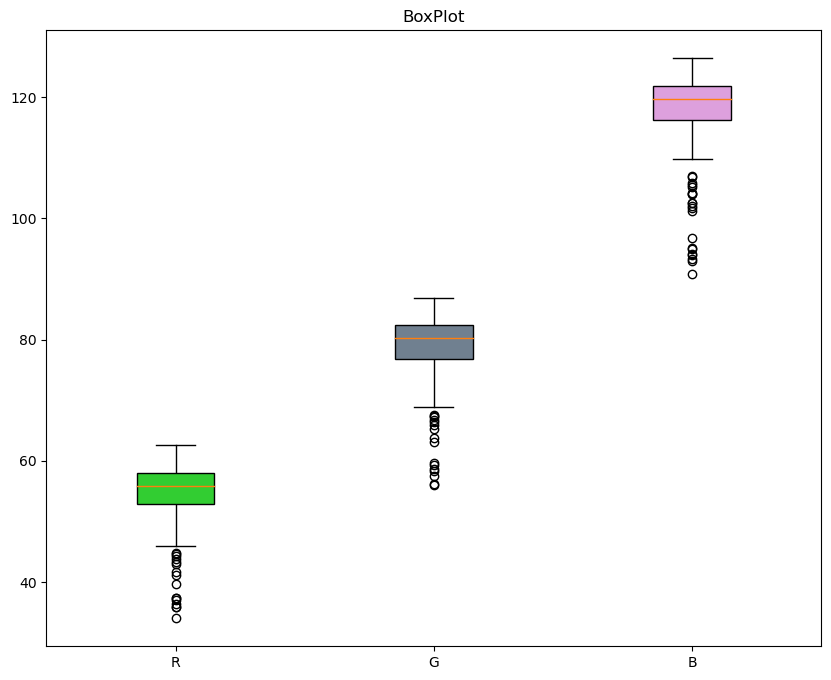

In [917]:
data_values = [data_3['R'], data_3['G'], data_3['B']]
labels = ['R', 'G', 'B']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(data_values, patch_artist=True)
colors = ['limegreen','slategray', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels)
ax.set_title('BoxPlot')
plt.show()

### Shapiro Wilk test of sample 3

In [918]:
r_values = data_3['R']
g_values = data_3['G']
b_values = data_3['B']

r_stat, r_pvalue = shapiro(r_values)
g_stat, g_pvalue = shapiro(g_values)
b_stat, b_pvalue = shapiro(b_values)

alpha = 0.05

print('Shapiro-Wilk Test Results')
print("Feature 'R':")
if r_pvalue > alpha:
    print('\tp-value = ', r_pvalue)
    print('\tCannot reject null hypothesis. The feature "R" follows a normal distribution.')
else:
    print('\tp-value =', r_pvalue)
    print('\t Reject null hypothesis. The feature "R" does not follow a normal distribution')


print("Feature 'G':")
if r_pvalue > alpha:
    print('\tp-value = ', g_pvalue)
    print('\tCannot reject null hypothesis. The feature "G" follows a normal distribution.')
else:
    print('\tp-value =', g_pvalue)
    print('\t Reject null hypothesis. The feature "G" does not follow a normal distribution')

print("Feature 'B':")
if r_pvalue > alpha:
    print('\tp-value = ', b_pvalue)
    print('\tCannot reject null hypothesis. The feature "B" follows a normal distribution.')
else:
    print('\tp-value =', b_pvalue)
    print('\t Reject null hypothesis. The feature "B" does not follow a normal distribution')

Shapiro-Wilk Test Results
Feature 'R':
	p-value = 5.564062021724565e-15
	 Reject null hypothesis. The feature "R" does not follow a normal distribution
Feature 'G':
	p-value = 2.8025745244485145e-15
	 Reject null hypothesis. The feature "G" does not follow a normal distribution
Feature 'B':
	p-value = 2.5234021397379415e-17
	 Reject null hypothesis. The feature "B" does not follow a normal distribution


### Kewness of sample 3 

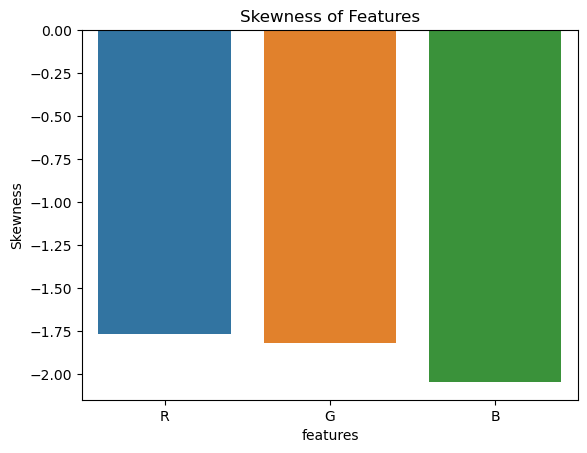

In [990]:
skewness = data_3.skew()
sns.barplot(x = skewness.index, y = skewness)
plt.title('Skewness of Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

# negative skewness means data skewded to the left and positive skewness means data skewed to the right.

### Mean and Variance of sample 3

In [919]:
mean_values = {}
variance_values = {}
for i, j in enumerate(data_3.columns):
   mean_values[i] = np.mean(data_3[j])
   variance_values[i] = np.var(data[j])
print('subsample_3 mean and variance')
print(f'mean_R : {mean_values[0]}, var_R : {variance_values[0]}\nmean_G : {mean_values[1]}, var_G : {variance_values[1]}\nmean_B : {mean_values[2]}, var_B : {variance_values[2]}')


subsample_3 mean and variance
mean_R : 54.7355386048387, var_R : 21.912016093930923
mean_G : 78.90088371774193, var_G : 28.000822728890952
mean_B : 118.01584597177418, var_B : 39.896131179129085


### Five Number summary of sample 3

In [920]:
# five number summary
data_3.describe().T

,count,mean,std,min,25%,50%,75%,max
R,248.0,54.735539,5.093099,34.043104,52.962735,55.943421,57.928544,62.700007
G,248.0,78.900884,5.667762,56.000277,76.869170,80.335175,82.362347,86.951955
B,248.0,118.015846,6.520391,90.897903,116.269485,119.694015,121.895057,126.430674


In [921]:
data_4 = pd.read_excel('C:/Users/z_ref_analyst1/Desktop/CCR_Img_regression/sample4/data.xlsx')

In [922]:
data_4.drop(columns=['Unnamed: 0', 'files'], inplace=True)

In [923]:
data_4.head()

,R,G,B
0,59.119395,84.503253,122.595899
1,58.265692,81.351316,118.398007
2,58.274190,83.678625,122.045920
3,41.212943,63.754809,94.061205
4,61.465388,86.748452,120.482635


### Distribution plot of sample 4

subsample_4 distribution plot


C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\2073430792.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4[feature], ax = ax, kde = True)
C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\2073430792.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4[feature

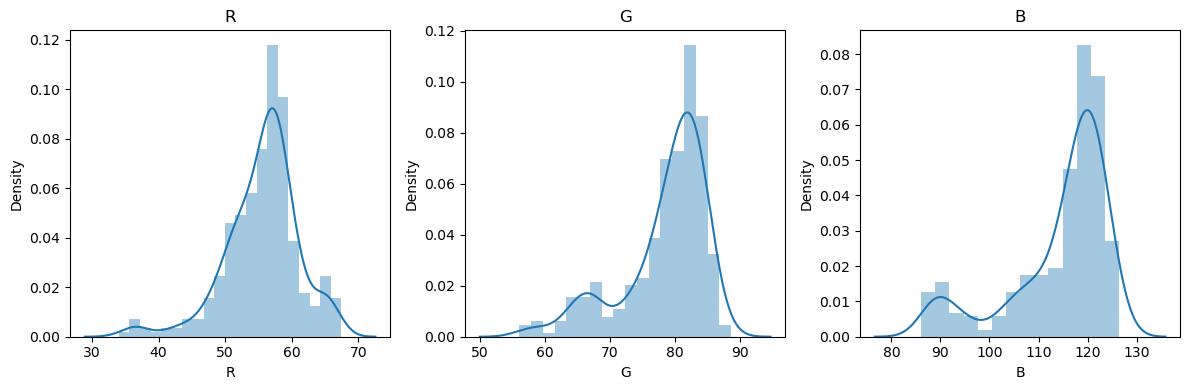

In [924]:
print('subsample_4 distribution plot')
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    sns.distplot(data_4[feature], ax = ax, kde = True)
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

### QQ-plot of sample 4

subsample_4 distribution plot


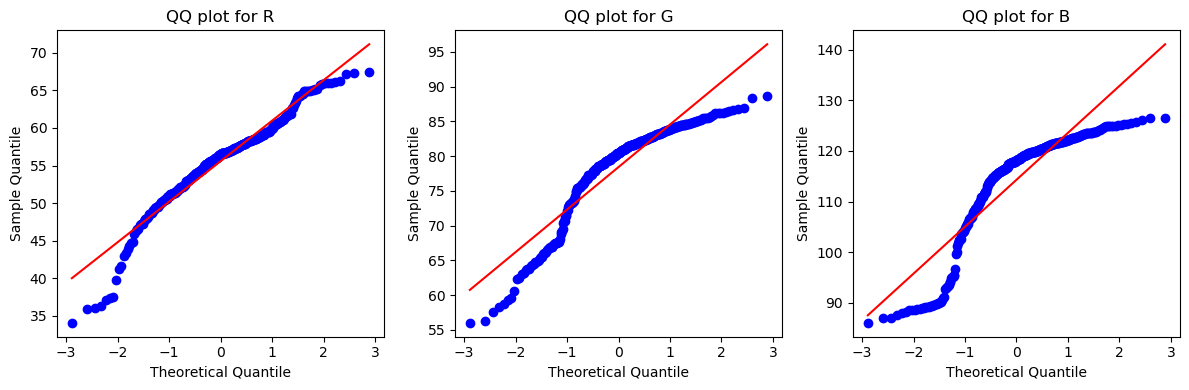

In [925]:
print('subsample_4 distribution plot')
features = ["R", "G", "B"]
fig, axes = plt.subplots(1, len(features), figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    stats.probplot(data_4[feature], plot= ax)
    #plt.xlabel(feature)
    #plt.ylabel('Count')

    ax.set_title(f'QQ plot for {feature}')
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Sample Quantile')

plt.tight_layout()
plt.show()

### Kurtosis of sample 4

R    2.045262
G    1.128785
B    0.905786
dtype: float64


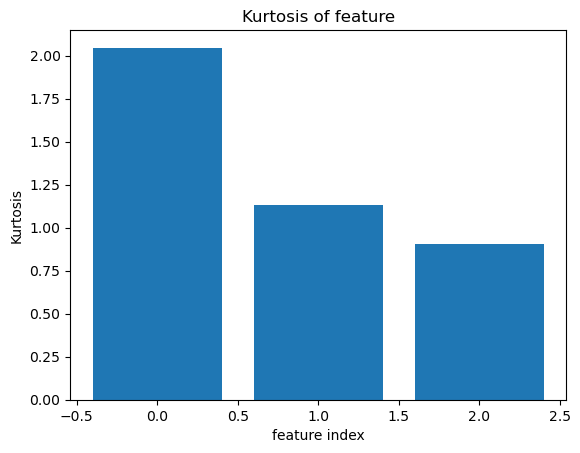

In [926]:
kurtosis_values = data_4.kurtosis()
print(kurtosis_values)
plt.bar(range(len(kurtosis_values)), kurtosis_values)
plt.xlabel('feature index')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of feature')
plt.show()
# Kurtosis : it is statistical measure that describe the shape of a distribution. It quantifies the extent to which a distribution devitaes from the shape of a normal distribution.
# A positive values indicates a distribution with heavier tails and a sharper peak compared to a normal distribution, while a negative kurtosis value indicates a distribution with lighter tails and a flatter peak compared to a normal distribution

### Boxplot of sample 4

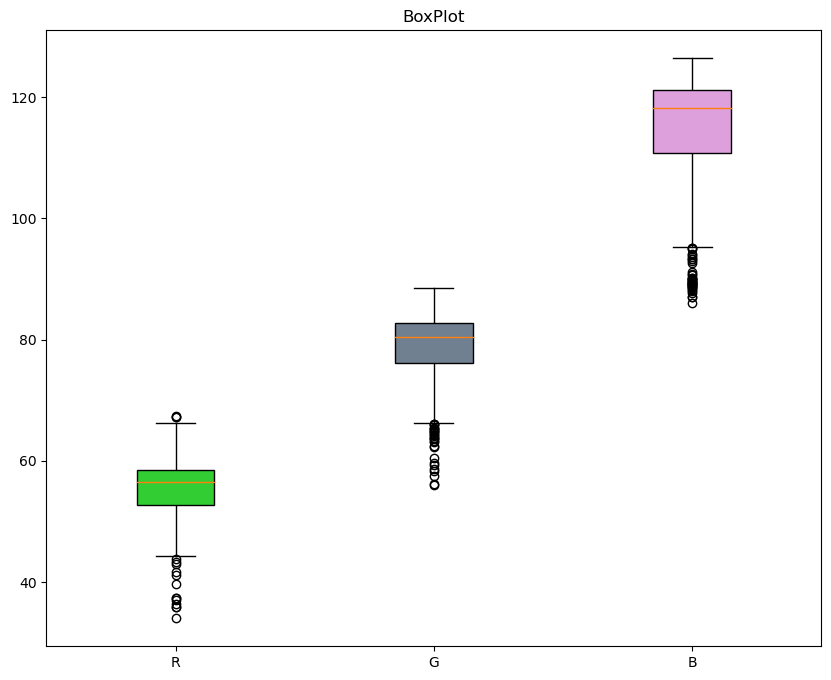

In [927]:
data_values = [data_4['R'], data_4['G'], data_4['B']]
labels = ['R', 'G', 'B']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(data_values, patch_artist=True)
colors = ['limegreen','slategray', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels)
ax.set_title('BoxPlot')
plt.show()

### Shapiro Wilk test of sample 4

In [928]:
# Shapiro Wilk test of sample 4 for normality test
r_values = data_4['R']
g_values = data_4['G']
b_values = data_4['B']

r_stat, r_pvalue = shapiro(r_values)
g_stat, g_pvalue = shapiro(g_values)
b_stat, b_pvalue = shapiro(b_values)

alpha = 0.05

print('Shapiro-Wilk Test Results')
print("Feature 'R':")
if r_pvalue > alpha:
    print('\tp-value = ', r_pvalue)
    print('\tCannot reject null hypothesis. The feature "R" follows a normal distribution.')
else:
    print('\tp-value =', r_pvalue)
    print('\t Reject null hypothesis. The feature "R" does not follow a normal distribution')


print("Feature 'G':")
if r_pvalue > alpha:
    print('\tp-value = ', g_pvalue)
    print('\tCannot reject null hypothesis. The feature "G" follows a normal distribution.')
else:
    print('\tp-value =', g_pvalue)
    print('\t Reject null hypothesis. The feature "G" does not follow a normal distribution')

print("Feature 'B':")
if r_pvalue > alpha:
    print('\tp-value = ', b_pvalue)
    print('\tCannot reject null hypothesis. The feature "B" follows a normal distribution.')
else:
    print('\tp-value =', b_pvalue)
    print('\t Reject null hypothesis. The feature "B" does not follow a normal distribution')

Shapiro-Wilk Test Results
Feature 'R':
	p-value = 6.428229615274006e-10
	 Reject null hypothesis. The feature "R" does not follow a normal distribution
Feature 'G':
	p-value = 4.858354999707317e-17
	 Reject null hypothesis. The feature "G" does not follow a normal distribution
Feature 'B':
	p-value = 3.910282765225338e-20
	 Reject null hypothesis. The feature "B" does not follow a normal distribution


### Skewness of sample 4

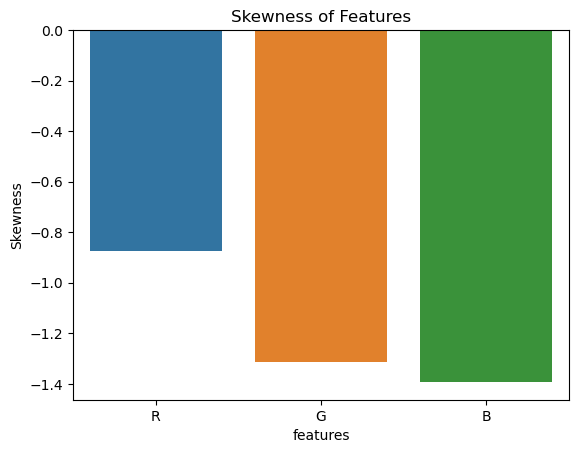

In [991]:
skewness = data_4.skew()
sns.barplot(x = skewness.index, y = skewness)
plt.title('Skewness of Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

# negative skewness means data skewded to the left and positive skewness means data skewed to the right.

### Mean and Variance of sample 4

In [929]:
mean_values = {}
variance_values = {}
for i, j in enumerate(data_4.columns):
   mean_values[i] = np.mean(data_4[j])
   variance_values[i] = np.var(data[j])
print('subsample_4 mean and variance')
print(f'mean_R : {mean_values[0]}, var_R : {variance_values[0]}\nmean_G : {mean_values[1]}, var_G : {variance_values[1]}\nmean_B : {mean_values[2]}, var_B : {variance_values[2]}')


subsample_4 mean and variance
mean_R : 55.56960993837535, var_R : 21.912016093930923
mean_G : 78.41509106722688, var_G : 28.000822728890952
mean_B : 114.30024736694678, var_B : 39.896131179129085


### Mean and Variance of sample 4

In [930]:
# Five number summary
data_4.describe().T

,count,mean,std,min,25%,50%,75%,max
R,357.0,55.569610,5.515318,34.043104,52.747760,56.521388,58.538996,67.445094
G,357.0,78.415091,6.542442,56.000277,76.153333,80.419422,82.835752,88.593879
B,357.0,114.300247,10.217795,86.073142,110.826435,118.203377,121.261984,126.430674


In [931]:
data_5 = pd.read_excel('C:/Users/z_ref_analyst1/Desktop/CCR_Img_regression/sample5/data.xlsx')

In [932]:
data_5.drop(columns=['Unnamed: 0', 'files'], inplace=True)

In [933]:
data_5.head()

,R,G,B
0,59.119395,84.503253,122.595899
1,58.265692,81.351316,118.398007
2,58.274190,83.678625,122.045920
3,41.212943,63.754809,94.061205
4,61.465388,86.748452,120.482635


### Distribution plot of sample 5

subsample_5 distribution plot


C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\2908899504.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5[feature], ax = ax, kde = True)
C:\Users\z_ref_analyst1\AppData\Local\Temp\ipykernel_28268\2908899504.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_5[feature

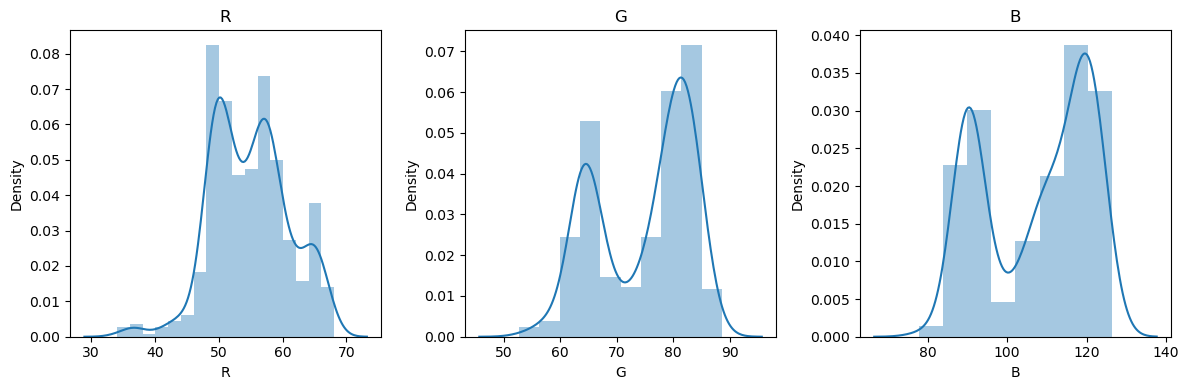

In [934]:
print('subsample_5 distribution plot')
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    sns.distplot(data_5[feature], ax = ax, kde = True)
    #plt.xlabel(feature)
    #plt.ylabel('Count')
    ax.set_title(feature)
plt.tight_layout()
plt.show()

### QQ-plot of sample 5

subsample_5 distribution plot


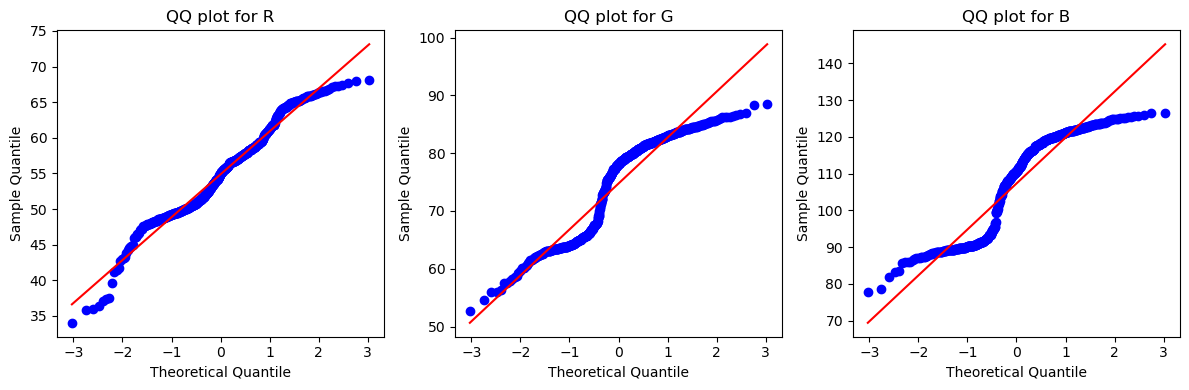

In [935]:
print('subsample_5 distribution plot')
features = ["R", "G", "B"]
fig, axes = plt.subplots(1, len(features), figsize = (12, 4))
for i, feature in enumerate(features):
    ax = axes[i]

    stats.probplot(data_5[feature], plot= ax)
    #plt.xlabel(feature)
    #plt.ylabel('Count')

    ax.set_title(f'QQ plot for {feature}')
    ax.set_xlabel('Theoretical Quantile')
    ax.set_ylabel('Sample Quantile')

plt.tight_layout()
plt.show()

### Kurtosis of sample of 5

R    0.042780
G   -1.259456
B   -1.475358
dtype: float64


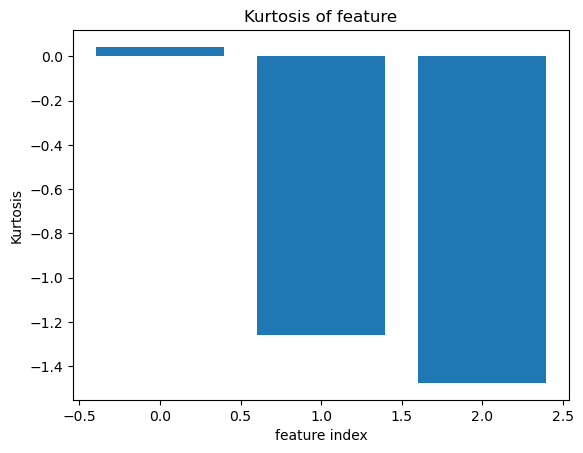

In [936]:
kurtosis_values = data_5.kurtosis()
print(kurtosis_values)
plt.bar(range(len(kurtosis_values)), kurtosis_values)
plt.xlabel('feature index')
plt.ylabel('Kurtosis')
plt.title('Kurtosis of feature')
plt.show()
# Kurtosis : it is statistical measure that describe the shape of a distribution. It quantifies the extent to which a distribution devitaes from the shape of a normal distribution.
# A positive values indicates a distribution with heavier tails and a sharper peak compared to a normal distribution, while a negative kurtosis value indicates a distribution with lighter tails and a flatter peak compared to a normal distribution

### Boxplot of sample 5

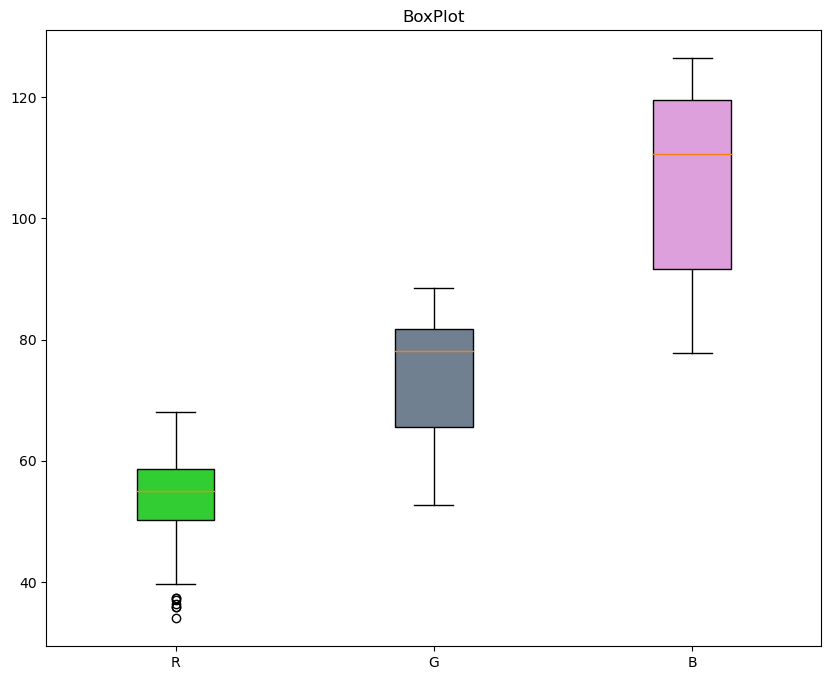

In [937]:
data_values = [data_5['R'], data_5['G'], data_5['B']]
labels = ['R', 'G', 'B']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(data_values, patch_artist=True)
colors = ['limegreen','slategray', 'plum']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_xticklabels(labels)
ax.set_title('BoxPlot')
plt.show()

### Shapiro test of sample of 5

In [938]:
# Shapiro test to check normality of distrubtion 
r_values = data_5['R']
g_values = data_5['G']
b_values = data_5['B']

r_stat, r_pvalue = shapiro(r_values)
g_stat, g_pvalue = shapiro(g_values)
b_stat, b_pvalue = shapiro(b_values)

alpha = 0.05

print('Shapiro-Wilk Test Results')
print("Feature 'R':")
if r_pvalue > alpha:
    print('\tp-value = ', r_pvalue)
    print('\tCannot reject null hypothesis. The feature "R" follows a normal distribution.')
else:
    print('\tp-value =', r_pvalue)
    print('\t Reject null hypothesis. The feature "R" does not follow a normal distribution')


print("Feature 'G':")
if r_pvalue > alpha:
    print('\tp-value = ', g_pvalue)
    print('\tCannot reject null hypothesis. The feature "G" follows a normal distribution.')
else:
    print('\tp-value =', g_pvalue)
    print('\t Reject null hypothesis. The feature "G" does not follow a normal distribution')

print("Feature 'B':")
if r_pvalue > alpha:
    print('\tp-value = ', b_pvalue)
    print('\tCannot reject null hypothesis. The feature "B" follows a normal distribution.')
else:
    print('\tp-value =', b_pvalue)
    print('\t Reject null hypothesis. The feature "B" does not follow a normal distribution')

Shapiro-Wilk Test Results
Feature 'R':
	p-value = 6.005046770951594e-08
	 Reject null hypothesis. The feature "R" does not follow a normal distribution
Feature 'G':
	p-value = 2.249673030696754e-19
	 Reject null hypothesis. The feature "G" does not follow a normal distribution
Feature 'B':
	p-value = 8.441850710340311e-21
	 Reject null hypothesis. The feature "B" does not follow a normal distribution


### Skewness of sample 5

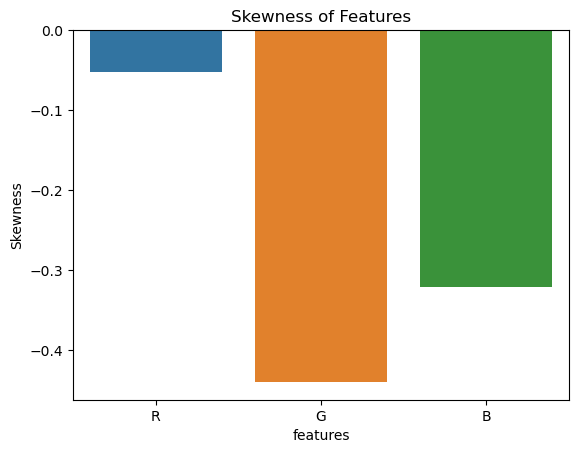

In [992]:
skewness = data_5.skew()
sns.barplot(x = skewness.index, y = skewness)
plt.title('Skewness of Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

# negative skewness means data skewded to the left and positive skewness means data skewed to the right.

### Mean and Variance of sample 5

In [939]:
mean_values = {}
variance_values = {}
for i, j in enumerate(data_5.columns):
   mean_values[i] = np.mean(data_5[j])
   variance_values[i] = np.var(data[j])
print('subsample_5 mean and variance')
print(f'mean_R : {mean_values[0]}, var_R : {variance_values[0]}\nmean_G : {mean_values[1]}, var_G : {variance_values[1]}\nmean_B : {mean_values[2]}, var_B : {variance_values[2]}')


subsample_5 mean and variance
mean_R : 54.88449895079086, var_R : 21.912016093930923
mean_G : 74.74924910544814, var_G : 28.000822728890952
mean_B : 107.30811046572936, var_B : 39.896131179129085


### Five number summary of sample 5

In [940]:
# Five number summary
data_5.describe().T

,count,mean,std,min,25%,50%,75%,max
R,569.0,54.884499,6.068899,34.043104,50.185179,55.006601,58.616489,68.098650
G,569.0,74.749249,8.371698,52.751032,65.641000,78.168038,81.830040,88.593879
B,569.0,107.308110,13.279108,77.774215,91.647038,110.646100,119.565165,126.430674


### T test confidence interval estimation

In [941]:
# Methods to estimate the confidence interval
# 1. Standard error Method
# 2. Bootstrap Method 
# 3. Student t test
# 4. Baysian Methods

In [942]:
red_values = np.array(data_5['R'])
green_values = np.array(data_5['G'])
blue_values = np.array(data_5['B'])
confidence_level = 0.95

In [943]:
sample_size = len(red_values)
sample_size

569

In [944]:
mean_R = np.mean(red_values)
mean_G = np.mean(green_values)
mean_B = np.mean(blue_values)
std_R = np.std(red_values, ddof=1)
std_G = np.std(green_values, ddof=1)
std_B = np.std(blue_values, ddof=1)

In [945]:
# Calculatind Degree of freedom
degree_of_freedom = sample_size - 1
degree_of_freedom

568

In [946]:
# Calculating critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df = degree_of_freedom)
critical_value

1.9641492809286907

In [947]:
# calculating standard error
standard_error_R = std_R / np.sqrt(sample_size)
standard_error_G = std_G / np.sqrt(sample_size)
standard_error_B = std_B / np.sqrt(sample_size)
standard_error_R, standard_error_G, standard_error_B

(0.2544214666170761, 0.35095983183723445, 0.5566891720190444)

In [948]:
# calculating margin of error
margin_of_error_red = critical_value * standard_error_R
margin_of_error_green = critical_value * standard_error_G
margin_of_error_blue= critical_value * standard_error_B
margin_of_error_red, margin_of_error_green, margin_of_error_blue

(0.4997217407087529, 0.6893375013379582, 1.0934206369219943)

In [949]:
# Calculating lower bound
lower_bound_R = mean_R - margin_of_error_red
lower_bound_G = mean_G - margin_of_error_green
lower_bound_B = mean_B - margin_of_error_blue
lower_bound_R, lower_bound_G, lower_bound_B

(54.384777210082106, 74.05991160411018, 106.21468982880737)

In [950]:
# Calculating Upper bound 
upper_bound_R = mean_R + margin_of_error_red
upper_bound_G = mean_G + margin_of_error_green
upper_bound_B = mean_B + margin_of_error_blue
upper_bound_R, upper_bound_G, upper_bound_B

(55.38422069149961, 75.4385866067861, 108.40153110265135)

In [951]:
print('Confidence interval for Red feature : ', lower_bound_R, upper_bound_R) # We estimated confidence interval using t test for true parameter to test statistcs i.e. to check how close test statistics (sample parameteres mean and variance) close to true mean and vairiance and true parameters should fall within confidence interval.
print('Confidence interval for Green feature : ', lower_bound_G, upper_bound_G)
print('Confidence interval for Blue feature : ', lower_bound_B, upper_bound_B)

Confidence interval for Red feature :  54.384777210082106 55.38422069149961
Confidence interval for Green feature :  74.05991160411018 75.4385866067861
Confidence interval for Blue feature :  106.21468982880737 108.40153110265135


### Interval estimation of feature R

c:\Users\z_ref_analyst1\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_continuous_distns.py:6703: RuntimeWarning: overflow encountered in power
  / (np.sqrt(df*np.pi)*(1+(x**2)/df)**((df+1)/2))


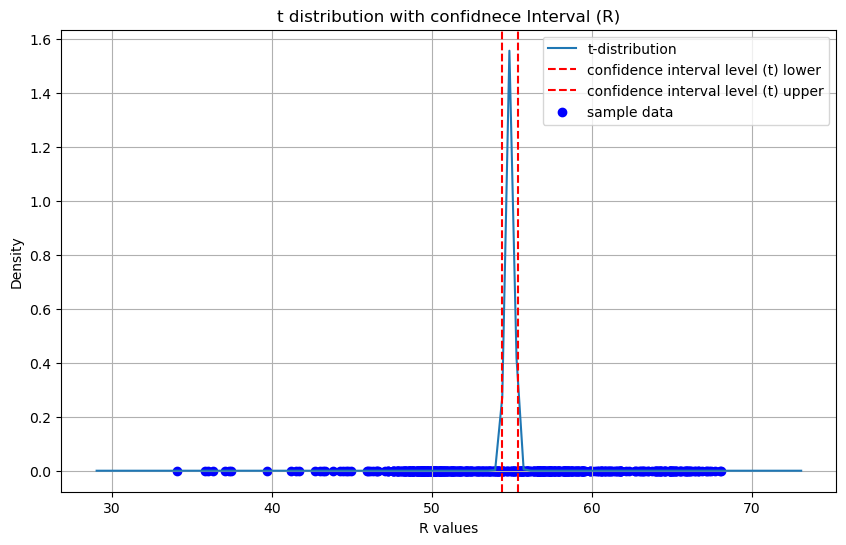

In [952]:


x = np.linspace(np.min(red_values)-5, np.max(red_values) + 5, 100)
y = t.pdf(x, df = len(red_values)-1, loc = np.mean(red_values), scale = np.std(red_values, ddof = 1)/np.sqrt(len(red_values)))
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 't-distribution')

plt.axvline(lower_bound_R, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_bound_R, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.scatter(red_values, np.zeros_like(red_values), color = 'b', label = 'sample data')
plt.legend()
plt.title('t distribution with confidnece Interval (R)')
plt.xlabel('R values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Interval estimation of sample G

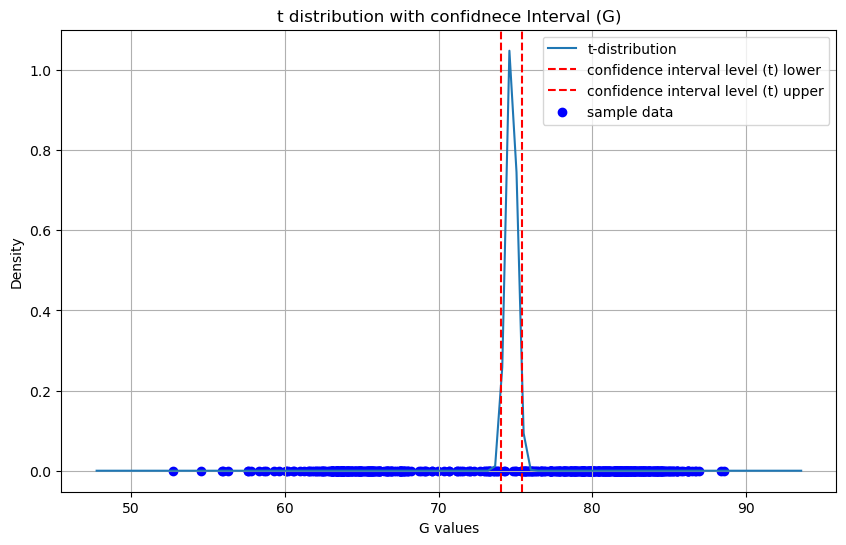

In [953]:
x = np.linspace(np.min(green_values)-5, np.max(green_values) + 5, 100)
y = t.pdf(x, df = len(green_values)-1, loc = np.mean(green_values), scale = np.std(green_values, ddof = 1)/np.sqrt(len(green_values)))
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 't-distribution')

plt.axvline(lower_bound_G, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_bound_G, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.scatter(green_values, np.zeros_like(red_values), color = 'b', label = 'sample data')
plt.legend()
plt.title('t distribution with confidnece Interval (G)')
plt.xlabel('G values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Interval estimation of B

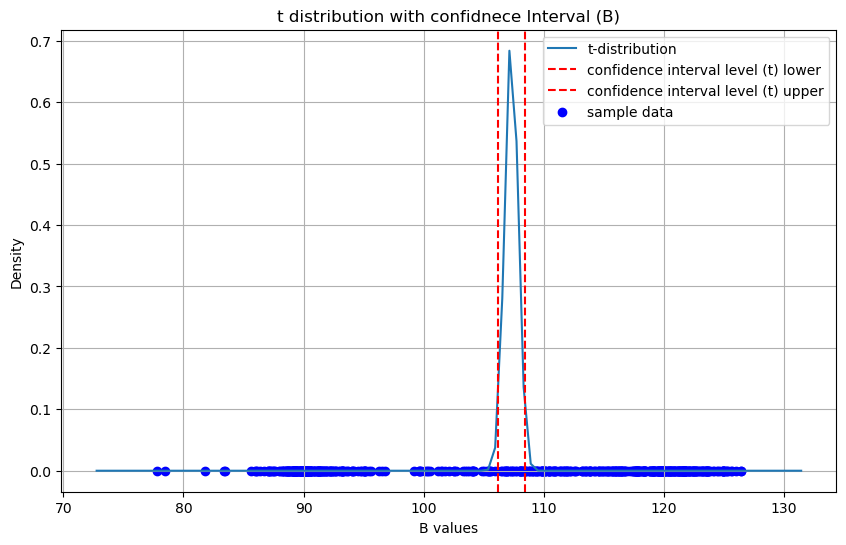

In [954]:
x = np.linspace(np.min(blue_values)-5, np.max(blue_values) + 5, 100)
y = t.pdf(x, df = len(blue_values)-1, loc = np.mean(blue_values), scale = np.std(blue_values, ddof = 1)/np.sqrt(len(blue_values)))
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 't-distribution')

plt.axvline(lower_bound_B, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_bound_B, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.scatter(blue_values, np.zeros_like(blue_values), color = 'b', label = 'sample data')
plt.legend()
plt.title('t distribution with confidnece Interval (B)')
plt.xlabel('B values')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Standard error method to estimate confidence interval

In [955]:
def confidence_interval_se(data, confidnece = 0.95):
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof = 1)
    sample_size = len(data)
    std_error = sample_std / np.sqrt(sample_size)
    margin_of_error = 1.96 * std_error
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    
    return(lower_bound, upper_bound)

In [956]:
# calculating lower and upper limit for R
lower_R_se, upper_R_se = confidence_interval_se(red_values)
lower_R_se, upper_R_se

(54.385832876221386, 55.38316502536033)

In [957]:
# calculating lower and upper limit for G
lower_G_se, upper_G_se = confidence_interval_se(green_values)
lower_G_se, upper_G_se

(74.06136783504716, 75.43713037584912)

In [958]:
# calculating lower and upper limit for B
lower_B_se, upper_B_se = confidence_interval_se(blue_values)
lower_B_se, upper_B_se

(106.21699968857203, 108.39922124288668)

### Intrval estimation of R

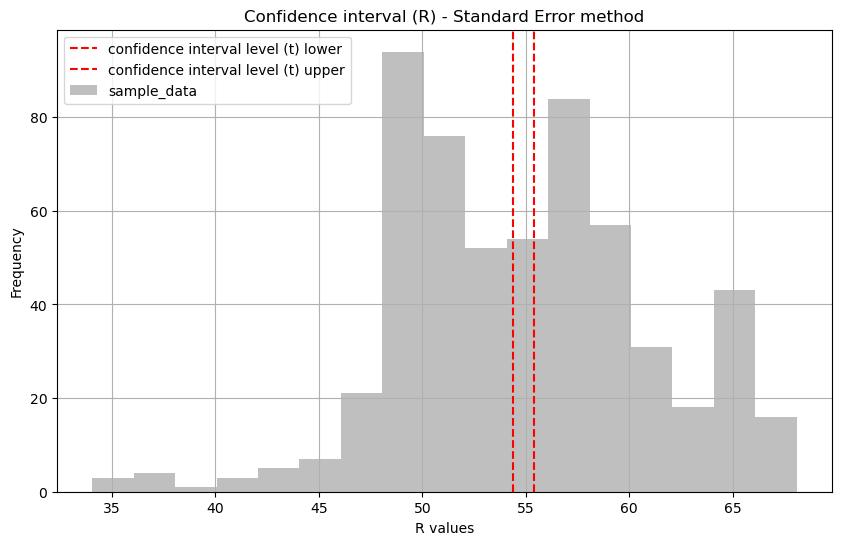

In [959]:
plt.figure(figsize=(10, 6))
plt.hist(red_values, bins = 'auto', color = 'gray', alpha = 0.5, label='sample_data')
plt.axvline(lower_R_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_R_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.legend()
plt.title('Confidence interval (R) - Standard Error method')
plt.xlabel('R values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Interval estimation of sample G

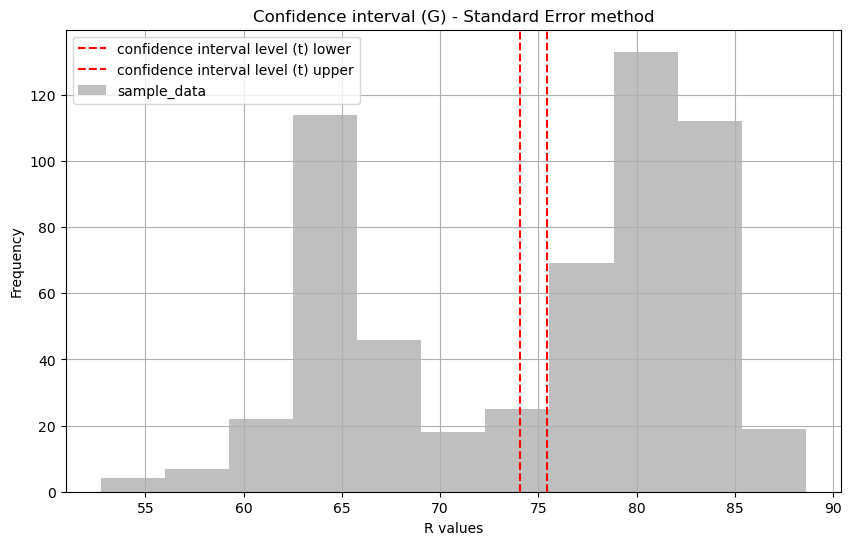

In [960]:
plt.figure(figsize=(10, 6))
plt.hist(green_values, bins = 'auto', color = 'gray', alpha = 0.5, label='sample_data')
plt.axvline(lower_G_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_G_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.legend()
plt.title('Confidence interval (G) - Standard Error method')
plt.xlabel('R values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Interval estimation of sample B

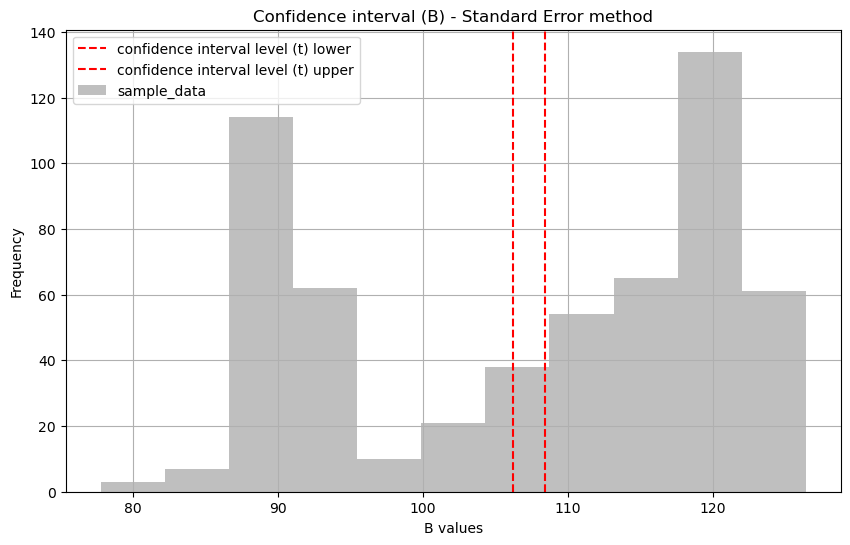

In [961]:
plt.figure(figsize=(10, 6))
plt.hist(blue_values, bins = 'auto', color = 'gray', alpha = 0.5, label='sample_data')
plt.axvline(lower_B_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) lower')
plt.axvline(upper_B_se, color = 'r', linestyle = '--', label = 'confidence interval level (t) upper')
plt.legend()
plt.title('Confidence interval (B) - Standard Error method')
plt.xlabel('B values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### One way ANOVA test for R sample 

In [995]:
# hypothesis test based on mean comparison among the group of feature R among five group(sample)

In [962]:
# We cannot use t-test here as t test is used for for 2 continous variables 
# Assumptions for t test for hypothesis testing
# 1. Independence : the observation within each group are independent of each other.
# 2. Normality : The distribution of the data within each group should follow normal distribution. This assumption particularly important when the sample size is small. For large sample sizes the t test is known to be robust to deviation from normality.


In [963]:
# Assummption for one way ANOVA test 
# 1. Independence : the observation within each group are independent of each other.
# 2. Normality : The distribution of the data within each group follows normal distribution .This assumption is important for each group separately, not for the overall combined data. Departures from normality are less critical for larger sample sizes, as the CLT often allows for approximate normality.

In [964]:
r_values_group_1 = np.array(data['R'])
r_values_group_2 = np.array(data_2['R'])
r_values_group_3 = np.array(data_3['R'])
r_values_group_4 = np.array(data_4['R'])
r_values_group_5 = np.array(data_5['R'])


In [965]:
f_value, p_value = stats.f_oneway(r_values_group_1, r_values_group_2, r_values_group_3, r_values_group_4, r_values_group_5)

In [966]:
alpha = 0.05

In [967]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There are significant differences in the mean R values')
else:
    print('Fail to reject the null hypothesis.')
    print('There is np significant difference in the mean R values.')

print('F-value:', f_value)
print('p_value', p_value)

Reject the null hypothesis
There are significant differences in the mean R values
F-value: 3.5132132655093193
p_value 0.007307362076648354


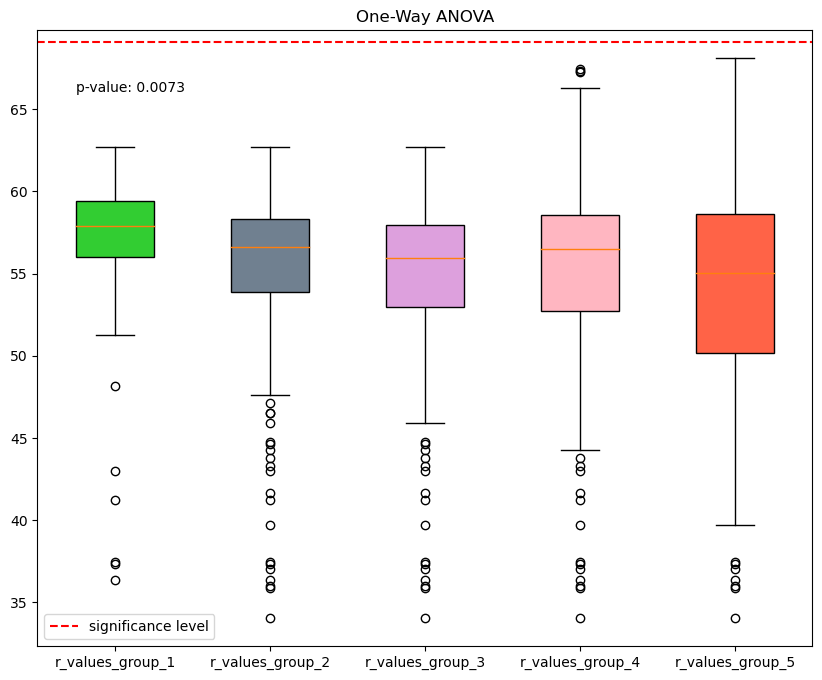

In [968]:
groups_r = [r_values_group_1, r_values_group_2, r_values_group_3, r_values_group_4, r_values_group_5]
labels_r = ['r_values_group_1', 'r_values_group_2', 'r_values_group_3', 'r_values_group_4', 'r_values_group_5']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(groups_r, patch_artist=True)
colors = ['limegreen','slategray', 'plum', 'lightpink', 'tomato']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.axhline(y = np.max(np.concatenate(groups_r)) + 1, color = 'r', ls = '--', label = 'significance level')
ax.annotate(f'p-value: {p_value:.4f}', xy = (0.05, 0.9), xycoords = 'axes fraction')
ax.legend()
ax.set_xticklabels(labels_r)
ax.set_title('One-Way ANOVA')
plt.show()

### One way ANOVA test for G sample 

In [969]:
g_values_group_1 = np.array(data['G'])
g_values_group_2 = np.array(data_2['G'])
g_values_group_3 = np.array(data_3['G'])
g_values_group_4 = np.array(data_4['G'])
g_values_group_5 = np.array(data_5['G'])


In [970]:
f_value, p_value = stats.f_oneway(g_values_group_1, g_values_group_2, g_values_group_3, g_values_group_4, g_values_group_5)

In [971]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There are significant differences in the mean G values')
else:
    print('Fail to reject the null hypothesis.')
    print('There is np significant difference in the mean G values.')

print('F-value:', f_value)
print('p_value', p_value)

Reject the null hypothesis
There are significant differences in the mean G values
F-value: 34.70100418542647
p_value 9.905059257752543e-28


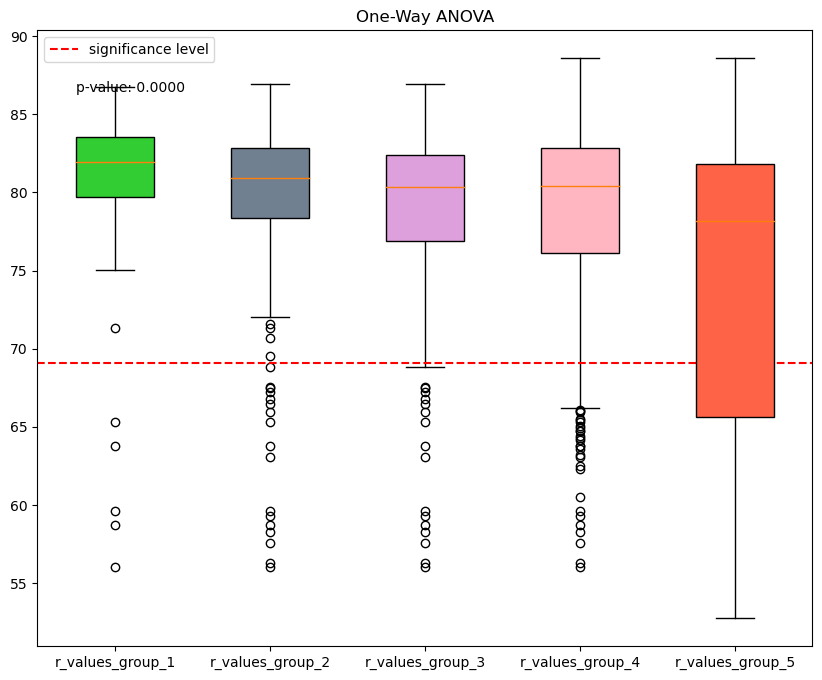

In [972]:
groups_g = [g_values_group_1, g_values_group_2, g_values_group_3, g_values_group_4, g_values_group_5]
labels_g = ['g_values_group_1', 'g_values_group_2', 'g_values_group_3', 'g_values_group_4', 'g_values_group_5']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(groups_g, patch_artist=True)
colors = ['limegreen','slategray', 'plum', 'lightpink', 'tomato']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.axhline(y = np.max(np.concatenate(groups_r)) + 1, color = 'r', ls = '--', label = 'significance level')
ax.annotate(f'p-value: {p_value:.4f}', xy = (0.05, 0.9), xycoords = 'axes fraction')
ax.legend()
ax.set_xticklabels(labels_r)
ax.set_title('One-Way ANOVA')
plt.show()

### One way ANOVA test for B sample 

In [973]:
b_values_group_1 = np.array(data['B'])
b_values_group_2 = np.array(data_2['B'])
b_values_group_3 = np.array(data_3['B'])
b_values_group_4 = np.array(data_4['B'])
b_values_group_5 = np.array(data_5['B'])

In [974]:
f_value, p_value = stats.f_oneway(b_values_group_1, b_values_group_2, b_values_group_3, b_values_group_4, b_values_group_5)

In [975]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There are significant differences in the mean B values')
else:
    print('Fail to reject the null hypothesis.')
    print('There is np significant difference in the mean B values.')

print('F-value:', f_value)
print('p_value', p_value)

Reject the null hypothesis
There are significant differences in the mean B values
F-value: 83.39130176011912
p_value 6.304437247685964e-64


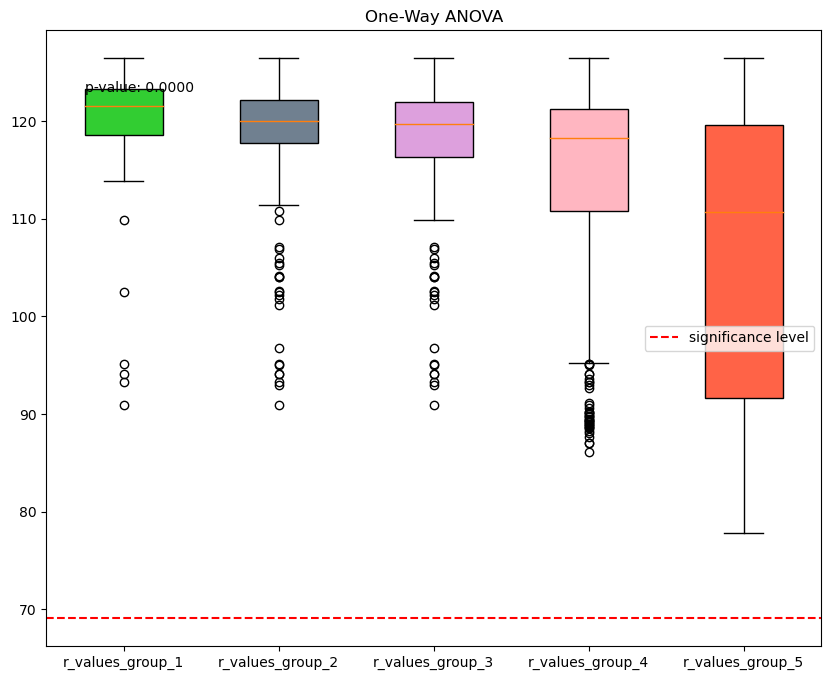

In [976]:
groups_b = [b_values_group_1, b_values_group_2, b_values_group_3, b_values_group_4, b_values_group_5]
labels_b = ['b_values_group_1', 'b_values_group_2', 'b_values_group_3', 'b_values_group_4', 'b_values_group_5']
fig, ax = plt.subplots(figsize = (10, 8))
boxplot = ax.boxplot(groups_b, patch_artist=True)
colors = ['limegreen','slategray', 'plum', 'lightpink', 'tomato']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
ax.axhline(y = np.max(np.concatenate(groups_r)) + 1, color = 'r', ls = '--', label = 'significance level')
ax.annotate(f'p-value: {p_value:.4f}', xy = (0.05, 0.9), xycoords = 'axes fraction')
ax.legend()
ax.set_xticklabels(labels_r)
ax.set_title('One-Way ANOVA')
plt.show()

### levene's test statistics for variance comparison for R 

In [994]:
# hypothesis test based on variance comparison among the group

In [977]:
alpha = 0.05
statistics, p_value = stats.levene(r_values_group_1, r_values_group_2, r_values_group_3, r_values_group_4, r_values_group_5)

In [978]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is evidence of a significant difference in variaance within the group.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no evidence of a significant difference in variaance within the group.')
print('statistics : ', statistics)
print('p-value : ', p_value)

Reject the null hypothesis
There is evidence of a significant difference in variaance within the group.
statistics :  13.601074302910332
p-value :  6.80557637905159e-11


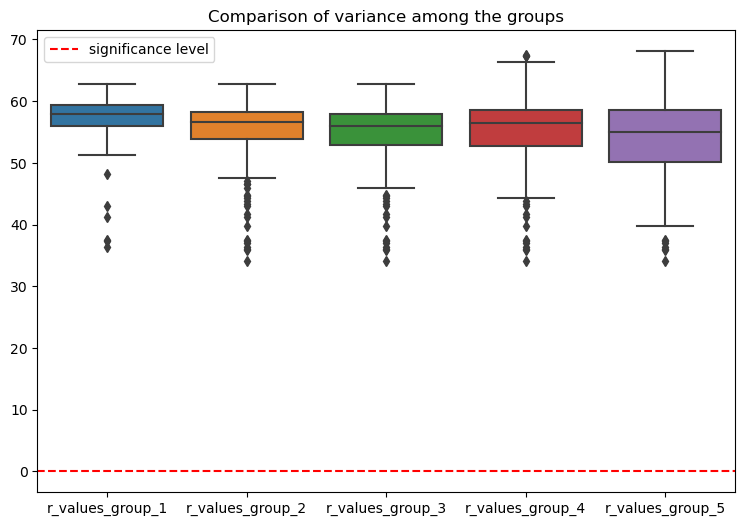

In [979]:
groups_r = [r_values_group_1, r_values_group_2, r_values_group_3, r_values_group_4, r_values_group_5]
labels_r = ['r_values_group_1', 'r_values_group_2', 'r_values_group_3', 'r_values_group_4', 'r_values_group_5']
plt.figure(figsize=(9, 6))
sns.boxplot(data = groups_r)
plt.title('Comparison of variance among the groups')
plt.xticks(range(len(groups_r)), labels_r)
plt.axhline(y = alpha, color = 'r', ls = '--', label = 'significance level')
plt.legend()
plt.show()

### levene's test statistics for variance comparison for G

In [980]:
alpha = 0.05
statistics, p_value = stats.levene(g_values_group_1, g_values_group_2, g_values_group_3, g_values_group_4, g_values_group_5)

In [981]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is evidence of a significant difference in variaance within the group.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no evidence of a significant difference in variaance within the group.')
print('statistics : ', statistics)
print('p-value : ', p_value)

Reject the null hypothesis
There is evidence of a significant difference in variaance within the group.
statistics :  35.8180476997471
p-value :  1.3249124682086333e-28


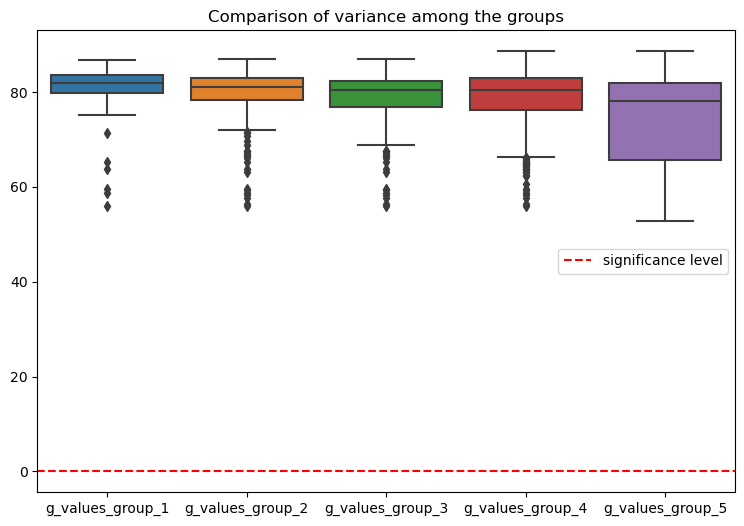

In [982]:
groups_r = [g_values_group_1, g_values_group_2, g_values_group_3, g_values_group_4, g_values_group_5]
labels_r = ['g_values_group_1', 'g_values_group_2', 'g_values_group_3', 'g_values_group_4', 'g_values_group_5']
plt.figure(figsize=(9, 6))
sns.boxplot(data = groups_r)
plt.title('Comparison of variance among the groups')
plt.xticks(range(len(groups_r)), labels_r)
plt.axhline(y = alpha, color = 'r', ls = '--', label = 'significance level')
plt.legend()
plt.show()

### levene's test statistics for variance comparison for B

In [983]:
alpha = 0.05
statistics, p_value = stats.levene(b_values_group_1, b_values_group_2, b_values_group_3, b_values_group_4, b_values_group_5)

In [984]:
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is evidence of a significant difference in variaance within the group.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no evidence of a significant difference in variaance within the group.')
print('statistics : ', statistics)
print('p-value : ', p_value)

Reject the null hypothesis
There is evidence of a significant difference in variaance within the group.
statistics :  87.36541769236038
p-value :  1.022926268782806e-66


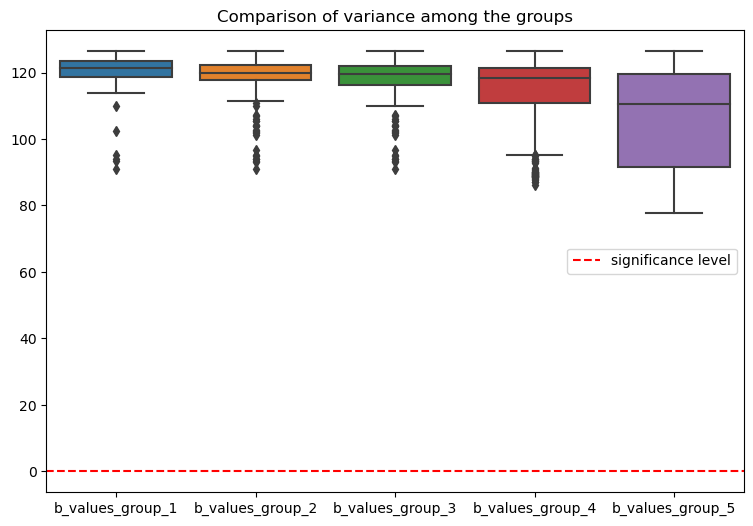

In [985]:
groups_r = [b_values_group_1, b_values_group_2, b_values_group_3, b_values_group_4, b_values_group_5]
labels_r = ['b_values_group_1', 'b_values_group_2', 'b_values_group_3', 'b_values_group_4', 'b_values_group_5']
plt.figure(figsize=(9, 6))
sns.boxplot(data = groups_r)
plt.title('Comparison of variance among the groups')
plt.xticks(range(len(groups_r)), labels_r)
plt.axhline(y = alpha, color = 'r', ls = '--', label = 'significance level')
plt.legend()
plt.show()

### Conclusion : after sampling and calculating mean and variance for each sample i observed that mean and variance varies ideally it should converge to true population mean and variance it means it should decrease. it means ideally images should produce consistent RGB values. Thus mobile camera is not suitable for collecting data.